# Statistics II

Welcome to Statistics II! In this part of the course we extend our understanding of statistics through R. It covers the following topics:

- <a href='#Covariance and Correlation'>Covariance and Correlation</a>  
- <a href='#Hypothesis Testing'>Hypothesis Testing</a>  
-   <a href='#Laws of Large Numbers'>Laws of Large Numbers</a>
-   <a href='#The Central Limit Theorem'>The Central Limit Theorem</a>
-  <a href='#Probability Limits'>Probability Limits</a>
-  <a href='#Normal Approximations'>Normal Approximations</a>
-  <a href='#Density and Supports'>Density and Supports</a>
- <a href='#Joint Probability'>Joint Probability</a>  
-  <a href='#Conditional Probability'>Conditional Probability</a>
- <a href="#Bayes' Theorem">Bayes' Theorem</a>
- <a href='#Statistics of Vectors'>Statistics of Vectors</a>
- <a href='#Higher Population Moments'>Higher Population Moments</a>


### Covariance and Correlation <a id='Covariance and Correlation'></a>

These two concepts are pretty intuitive and many of you probably already have a strong grasp of them. They're also absolutely foundational for metrics so we'll cover them in detail. The best way to remember what these concepts are is covariance is co-variance and correlation is just standardised covariance. By that we simply mean that covariance is the amount of variance which is shared by two different random variables. Mathematically this is $Cov(X,Y)=\frac{1}{n}\sum\limits_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})=E((X-E(X))(Y-E(Y)))$. What does this formula mean? It is a measure of the average which $X$ and $Y$ deviate from their means simulatenously. That means that if observations of $X$ and $Y$ (so $x_i, y_i$) are likely to vary from their means at the same time in the same direction then they will have a large positive covariance. If they're likely to vary from their means at the same time in different directions they will have a large negative covariance. If they're not likely to vary from their means at the same time they won't have a large covariance. 

Correlation is just a way to standardise 'large' and 'small'. Covariance is in the same units as variance (like $£^2$), which isn't always that easy to make sense of. Correlation divides covariance by the terms' individual standard deviations to ensure we get a number between -1 and 1, so $Corr(X,Y)=\dfrac{Cov(X,Y)}{sd(X)sd(Y)}.$ If you want to know why correlation has to be between -1 and 1 then you need the 'Cauchy Schwartz Inequality', but we won't cover that here.

Let's see how R can help us calculate covariance and correlation using a real dataset. We'll use a dataset which contains essentially every player statistic in Fifa '19:

In [1]:
data<-read.csv('https://raw.githubusercontent.com/hands-on-econ/Hands-On-Econ/master/Datasets/data-3.csv')
head(data,10)

X,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,⋯,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release.Clause
<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,⋯,96,33,28,26,6,11,15,14,8,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,⋯,95,28,31,23,7,11,15,14,11,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,⋯,94,27,24,33,9,9,15,15,11,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,⋯,68,15,21,13,90,85,87,88,94,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,⋯,88,68,58,51,15,13,5,10,13,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,⋯,91,34,27,22,11,12,6,8,8,€172.1M
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,⋯,84,60,76,73,13,9,7,14,9,€137.4M
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,⋯,85,62,45,38,27,25,31,33,37,€164M
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,⋯,82,87,92,91,11,8,9,7,11,€104.6M


Clearly there's a lot here, so let's check out the columns we can use to start with:

In [2]:
colnames(data)

[1] "X"                        "ID"                      
 [3] "Name"                     "Age"                     
 [5] "Photo"                    "Nationality"             
 [7] "Flag"                     "Overall"                 
 [9] "Potential"                "Club"                    
[11] "Club.Logo"                "Value"                   
[13] "Wage"                     "Special"                 
[15] "Preferred.Foot"           "International.Reputation"
[17] "Weak.Foot"                "Skill.Moves"             
[19] "Work.Rate"                "Body.Type"               
[21] "Real.Face"                "Position"                
[23] "Jersey.Number"            "Joined"                  
[25] "Loaned.From"              "Contract.Valid.Until"    
[27] "Height"                   "Weight"                  
[29] "LS"                       "ST"                      
[31] "RS"                       "LW"                      
[33] "LF"                       "CF"                      
[35] "RF"                       "RW"                      
[37] "LAM"                      "CAM"                     
[39] "RAM"                      "LM"                      
[41] "LCM"                      "CM"                      
[43] "RCM"                      "RM"                      
[45] "LWB"                      "LDM"                     
[47] "CDM"                      "RDM"                     
[49] "RWB"                      "LB"                      
[51] "LCB"                      "CB"                      
[53] "RCB"                      "RB"                      
[55] "Crossing"                 "Finishing"               
[57] "HeadingAccuracy"          "ShortPassing"            
[59] "Volleys"                  "Dribbling"               
[61] "Curve"                    "FKAccuracy"              
[63] "LongPassing"              "BallControl"             
[65] "Acceleration"             "SprintSpeed"             
[67] "Agility"                  "Reactions"               
[69] "Balance"                  "ShotPower"               
[71] "Jumping"                  "Stamina"                 
[73] "Strength"                 "LongShots"               
[75] "Aggression"               "Interceptions"           
[77] "Positioning"              "Vision"                  
[79] "Penalties"                "Composure"               
[81] "Marking"                  "StandingTackle"          
[83] "SlidingTackle"            "GKDiving"                
[85] "GKHandling"               "GKKicking"               
[87] "GKPositioning"            "GKReflexes"              
[89] "Release.Clause"

We expect there to be a pretty high covariance and correlation between a variable like 'BallControl' and overall score. We can check this as follows:

In [3]:
data1<-na.omit(data)
cov(data1[,'BallControl'],data1[,'Overall'])
cor(data1[,'BallControl'],data1[,'Overall'])

[1] 53.06634

[1] 0.4600335

We used `na.omit()` to make sure that null values weren't present in our data. We didn't *delete* these but just created a new dataset where they weren't present. If we want to check whether our previous formula for correlation is actually right we can do this by using the function `sd()` to check:

In [4]:
cov(data1[,'BallControl'],data1[,'Overall'])/(sd(data1[,'BallControl'])*sd(data1[,'Overall']))==
cor(data1[,'BallControl'],data1[,'Overall'])

[1] TRUE

Great. Also we can see R doesn't mind that we went over two lines. It knows to keep looking at the start of the next line if no command has been entered. If we want to see this graphically we can do that too:

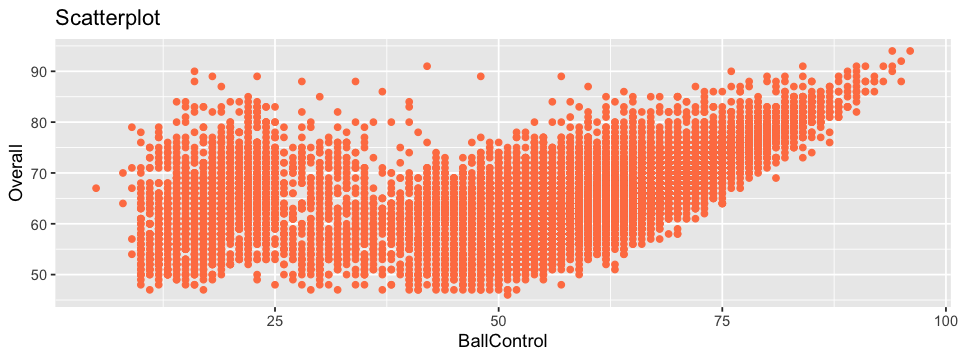

In [5]:
options(repr.plot.width=8, repr.plot.height=3)
library(ggplot2)
ggplot(data1,aes(x=BallControl,y=Overall))+geom_point(colour='coral')+ggtitle('Scatterplot')

What about if we thought this relationship was different for goalkeepers? Well first we find how goalkeepers are enocded:

In [6]:
unique(data1[,'Position'])

[1] RF  ST  LW  GK  RCM LF  RS  RCB LCM CB  LDM CAM CDM LS  LCB RM  LAM LM  LB 
[20] RDM RW  CM  RB  RAM CF  RWB LWB
28 Levels:  CAM CB CDM CF CM GK LAM LB LCB LCM LDM LF LM LS LW LWB RAM ... ST

Then we use the `colour` attribute in `aes()` for the command `ggplot()` to seperate the data into whether each player is a goalkeeper or not:

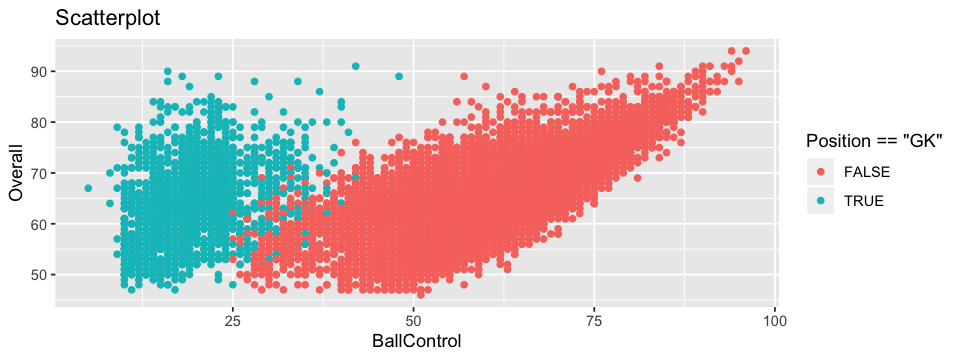

In [7]:
options(repr.plot.width=8, repr.plot.height=3)
library(ggplot2)
ggplot(data1,aes(x=BallControl,y=Overall,colour=Position=='GK'))+geom_point()+ggtitle('Scatterplot')

We were right! Goalkeepers display a much weaker relationship between 'BallControl'and 'Overall'. There is a bit more we can do to see why this makes sense. The first is by simply comparing the correlations for goalkeepers and non-goalkeepers as follows:

In [8]:
cor(data1[data1['Position']=='GK','Overall'],data1[data1['Position']=='GK','BallControl'])
cor(data1[data1['Position']!='GK','Overall'],data1[data1['Position']!='GK','BallControl'])

[1] 0.3417241

[1] 0.717933

As expected. The second thing we can do is add the individual histograms to our previous plot to get a better sense of how the variance of Overall and BallControl line up for goalkeepers and non-goalkeepers. We introduce `coord_flip()`to flip our Overall  here and `theme(legend.position = "none")` to turn off our legends. 

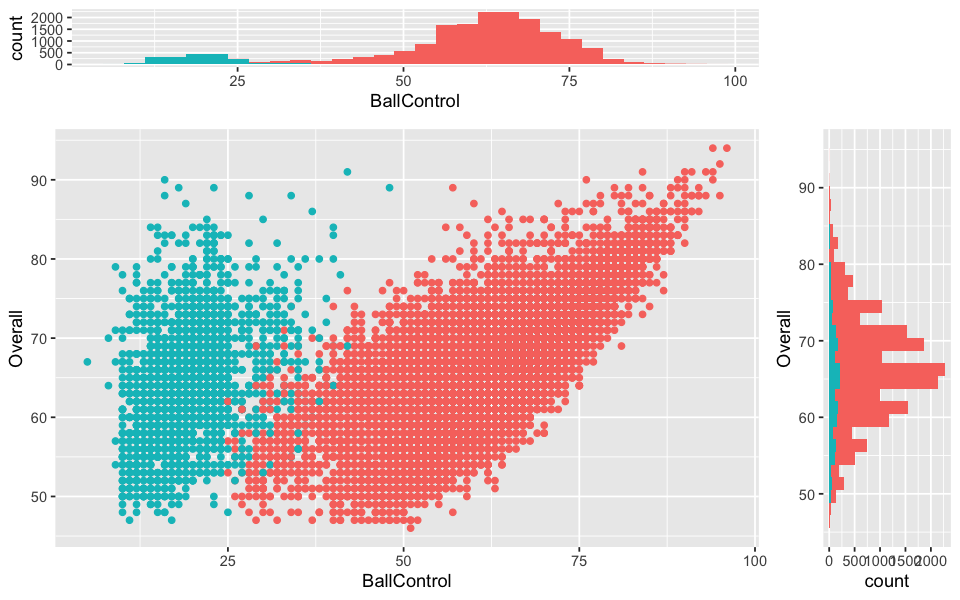

In [9]:
options(repr.plot.width=8, repr.plot.height=5)
library(gridExtra)
a<-ggplot(data1,aes(x=BallControl,fill=Position=='GK'))+geom_histogram(bins=30)+theme(legend.position = "none")
b<-ggplot() + theme_void()
c<-ggplot(data1,aes(x=BallControl,y=Overall,colour=Position=='GK'))+geom_point()+theme(legend.position = "none")
d<-ggplot(data1,aes(x=Overall,fill=Position=='GK'))+geom_histogram(bins=30)+coord_flip()+theme(legend.position = "none")
grid.arrange(a,b,c,d,ncol=2,widths=c(4,1),heights=c(1,4))

Awesome, right! What this shows us is that while the goalkeepers' Overall scores vary significantly, their BallControl does not. By contrast non-goalkeepers' BallControl varies a lot, but roughly in the same way as their Overall. One more way to see this is as follows:

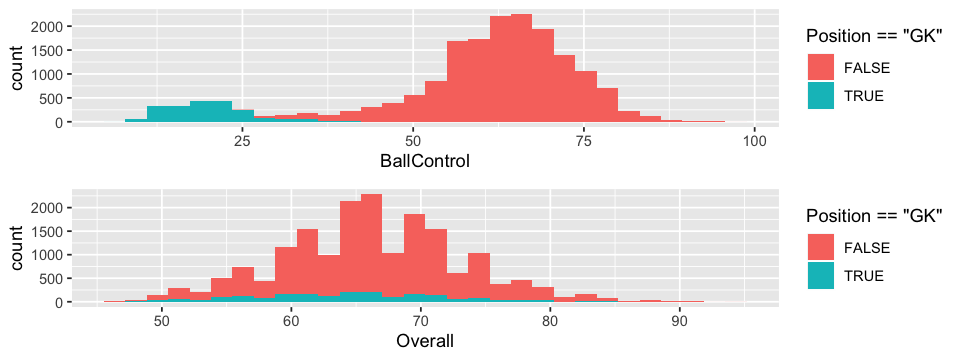

In [10]:
options(repr.plot.width=8, repr.plot.height=3)
a<-ggplot(data1,aes(x=BallControl,fill=Position=='GK'))+geom_histogram(bins=30)
b<-ggplot(data1,aes(x=Overall,fill=Position=='GK'))+geom_histogram(bins=30)
grid.arrange(a,b)

The goalkeepers' histograms line up a lot less, so their Overall/BallControl correlation is much lower than the non-goalkeepers. Hopefully you're starting to see just how useful R can be to get a sense of our data.

### Hypothesis Testing<a id='Hypothesis Testing'></a>

Hypothesis testing is an essential part of metrics so we need to understand it pretty well. Fortunately you probably already do because it's so intuitive. There are really just three parts to any hypothesis test: a hypothesis (null and alternative), a test-statistic and a rejection rule. For example consider the test that the mean of some data is equal to 7. We don't know anything about the data but we have every single data point loaded into R. Before we go further we need to clarify what the alternative is, so let's just make it easy and say it's that the mean is not 7. So our hypotheses are: 

$H_0:\mu=7$

$H_1:\mu\neq7$

So part 1 done. What about a test statistic? Because we can't know the population mean of our data (I mean unless we use R's `rnorm()` function to generate them as we will in a second, but let's pretend like we didn't do this) we have to use the next best thing: the sample mean. We also don't know the population variance of our data so we have to use the sample error of the mean for our standard error, or $\dfrac{sd(X)}{\sqrt{n}}$. So our test statistic is $t=\dfrac{\bar{X}-7}{\dfrac{sd(X)}{\sqrt{n}}}$. We should know that this is distributed around the t-distribution as $sd(X)$ is distributed around the Chi-squared distribution with n degrees of freedom.

Now for our third and final part, the rejection rule. This is the value our test-statistic has to exceed for us to reject the null, so clearly it has to be related to the significance level of our test.  Say we want to be sure at the 5% level, so we look up the critical value of the t-distribution for our degrees of freedom at the *2.5% level* (two-sided test) and then we know to reject if the absolute value of our test-statistic exceeds this value, which we call $t_{crit}$. Now let's do it for real. First we generate our data (using `set.seed()` helps us be sure everyone will get the same results:

In [11]:
set.seed(1)
testdata<-rnorm(10000,7,20)

Now we check the critical value

In [12]:
t_crit<-qt(0.975,df=10000)
t_crit

[1] 1.960201

Obviously we can pretty much just use the normal distribution because we have so much data. But it's good practice to stick with the t-distribution for now. Now we perform out test!

In [30]:
mean(testdata)
(sd(testdata)/(length(testdata))^0.5)
t<-(mean(testdata)-7)/(sd(testdata)/(length(testdata))^0.5)
t
t>t_crit

[1] 6.869259

[1] 0.2024713

[1] -0.6457251

[1] FALSE

So we don't find evidence to reject the null! We can check we've done everything right by using R's built in `t.test()` function:

In [31]:
t.test(testdata,mu=7)


	One Sample t-test

data:  testdata
t = -0.64573, df = 9999, p-value = 0.5185
alternative hypothesis: true mean is not equal to 7
95 percent confidence interval:
 6.472375 7.266144
sample estimates:
mean of x 
 6.869259 


Yep! No rejection as the absolute value of the test-stat (-0.64573) is not greater than the critical value 1.96, so we did it all right. If we want to be *super sure* we can just make sure the p-value of our DIY test matches up with R's in-built test function. We don't need to do this because our test stats were the same but it's good practice:

In [33]:
2*pt(abs(-0.64573),df=10000,lower=F)

[1] 0.518469

Yep! All good! We will do lots of hypothesis tests in Econometrics I-IV so we won't do any more here but all of them will follow this structure. The last thing we want to see is what Type I and II errors look like and what test power means:

 ### Laws of Large Numbers<a id='Laws of Large Numbers'></a>



The Laws of Large Numbers and our next section, <a href='#The Central Limit Theorem'>The Central Limit Theorem</a> are probably two of the most incredible things we will cover in this course. By incredible we mean that "wow maths really can be beautiful can't it" kind of incredible. The Laws of Large Numbers (LLNs) refer to two laws (strong and weak) which can be used in different circumstances to show that as the number of samples tends to infinity the sample average tends to the population mean. We are only really worried about the weak law here, which we can rewrite as $\bar{X_n} \xrightarrow{ p } \mu$, where the $p$ means 'probability limit'. We will cover these in more detail in <a href='#Probability Limits'>Probability Limits</a>, but right now what's essential is to get sample averages are converging to the population mean. Let's see an example with a fair die (so $\mu=3.5$):

In [16]:
df<-data.frame()
df1<-data.frame()
for (i in 1:10000) {df[i,1]<-sample(1:6,1,replace=T)}
for (i in 1:10000) {df1[i,1]<-mean(df[1:i,1])}
df1$index<-as.numeric(row.names(df1))
colnames(df1)<-c('Mean','SampleSize')

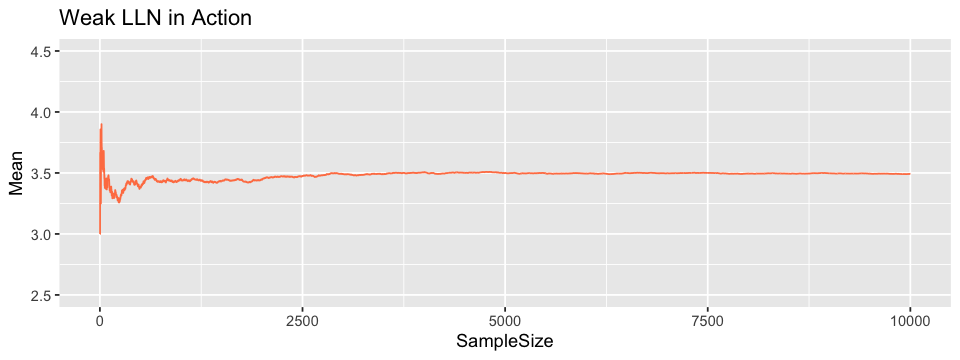

In [17]:
options(repr.plot.width=8, repr.plot.height=3)
ggplot(df1,aes(x=SampleSize,y=Mean))+geom_line(colour='coral',size=0.5)+ylim(2.5,4.5)+ggtitle('Weak LLN in Action')

This might seem simple but it is kind of incredible! It might not seem that obvious why it is incredible for dice (obviously $\mu=3.5$!) but the incredible part is when we have no idea what $\mu$ is. As long as we have independent and identically distributed (i.i.d) random variables we will be able to find their expected value by letting the number of samples approach infinity. We don't even need finite variance! There's a lot we can do with this, as we'll see later on.

### The Central Limit Theorem<a id='The Central Limit Theorem'></a>

The Central Limit Theorem (CLT) is even cooler in many ways. It states if we have a random sample {$X_1,X_2,...,X_n$} from a known probability distribution with finite variance then we can can make a random variable from this sample which follows the normal distribution. The first thing to unpack here is 'random sample'. This essentially just means that we have a set of i.i.d random variables, or that {$X_1,X_2,...,X_n$} $\sim i.i.d (\mu,\sigma^2)$. The second is how we can 'make' this random variable. From the Weak LLN we covered previously we know that $\bar{X_n} \xrightarrow{ p } \mu$, as n approaches infinity, so we know that $(\bar{X_n}-\mu) \xrightarrow{ p }0$. What the CLT tells us is that $\sqrt{n}(\bar{X_n}-\mu) \xrightarrow{ d } N(0,\sigma^2)$. This $\xrightarrow{ d }$ just means 'approaches in distribution', or 'gets infinitessimally close to the distribution of'. A form of this you're probably more familiar with is: $\bar{X} \sim N(\mu,\dfrac{\sigma^2}{n})$, which is just the distribution of the sample mean. 

This might not seem that amazing but keep in mind that ***the underlying distribution doesn't have to be normal!*** The most incredible example of this is the Bernoulli distribution, the most non-normal distribution possible. Let's take a random sample of 100 from the $Bernoulli(0.9)$ distribution which we know has a $\mu=0.9$ and a $\sigma^2=0.9(1-0.9)=0.09$:

In [18]:
a<-data.frame(rbinom(100,1,0.9))
head(a,10)

rbinom.100..1..0.9.
<int>
1
1
1
1
1
1
1
1
1


Then we know that $10(\bar{X}-0.9) \xrightarrow{ d } N(0,0.09)$, so $\bar{X}\xrightarrow{ d } N(0.9,0.0009)$. Let's test this:

In [19]:
df<-data.frame()
for (i in 1:10000) {df[i,1]<-mean(rbinom(100,1,0.9))}
colnames(df)<-'Mean'

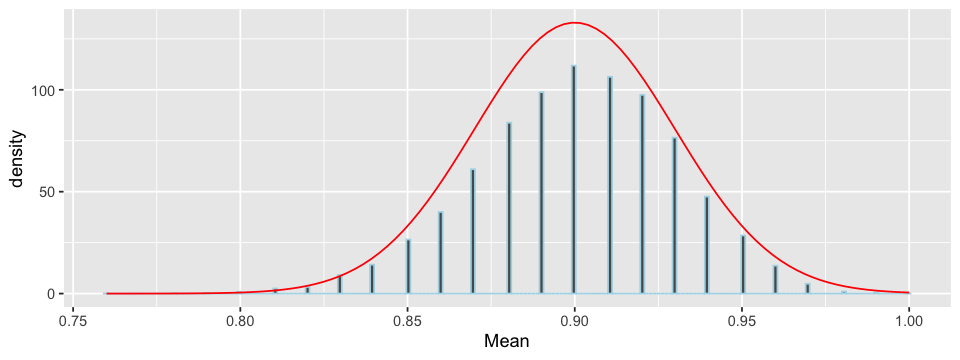

In [20]:
ggplot(df,aes(x=Mean))+geom_histogram(bins=200,aes(y=..density..),colour='lightblue')+stat_function(fun=function(x,mu,sd){dnorm(x,0.9,0.03)*10},colour='red')

 ### Probability Limits <a id='Probability Limits'></a>



  ### Normal Approximations<a id='Normal Approximations'></a>



### Density and Supports<a id='Density and Supports'></a>



### Joint Probability <a id='Joint Probability'></a>

We have already covered a range of different probability distribution for single random variables but what we haven't seen so far is how pairs or vectors of random variables can be distributed. This of course is something you will have studied before but it's important enough to merit a second treatment here. We'll start with the bivariate case because this is much simpler.





easiest way to think about a joint probability distribution is as 

 ### Conditional Probability<a id='Conditional Probability'></a>



 ### Bayes' Theorem <a id="Bayes' Theorem"></a>



  ### Statistics of Vectors<a id='Statistics of Vectors'></a>



  ###  Higher Population Moments<a id='Higher Population Moments'></a>

So far we've only looked at the first two population moments, $E(X)$ and $E(X^2)$ but the next two are also of interest to us. The third population moment $E(X^3)$ can be used to find 'skewness' or how skewed our data is. We've already seen lots of skewed data but let's use an example from our Fifa '19 dataset - `Wage`. As a general rule income data will probably be positively skewed (lots of outliers on the right of the distribution) because in essentially every group there will be some people earning far, far more than the median wage:

In [21]:
data[,'Wage']<-gsub('K','',data[,'Wage'])
data[,'Wage']<-gsub('€','',data[,'Wage'])
data[,'Wage']<-as.numeric(data[,'Wage'])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   3.000   9.731   9.000 565.000 

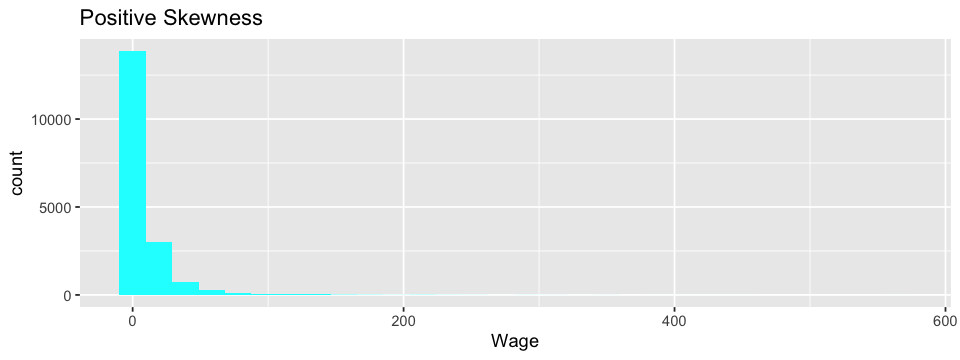

In [22]:
options(repr.plot.width=8, repr.plot.height=3)
ggplot(data,aes(Wage))+geom_histogram(fill='cyan',bins=30)+ggtitle('Positive Skewness')
summary(data[,'Wage'])

Even the summary statistics should tell us a lot - 75% of players earn €9,000 or less per week but the top footballer (Ronaldo - check it if you want) earns more than 50 times that. How can we check the skewness of this wage data using the third population moment? Well to start with we can't use the third population moment $E(X^3)$ because we don't know anything about the population this data comes from, so we have to use the third *sample* moment $\frac{1}{n} \sum\limits_{i=1}^{n}(x_i)^3$. More importantly we actually want the third *centralised* sample moment $\frac{1}{n} \sum\limits_{i=1}^{n}(x_i-\bar{x})^3$. And in order to deal with our 'variance problem' of our units of measurement now being in €$^3$ we divide this by standard deviation cubed to get $Skew(X)=\dfrac{\frac{1}{n} \sum\limits_{i=1}^{n}(x_i-\bar{x})^3}{\sqrt{\frac{1}{n-1} \sum\limits_{i=1}^{n}(x_i-\bar{x})^2}^{ 3}}$, or in our data:

In [23]:
(1/nrow(data))*sum((data[,'Wage']-mean(data[,'Wage']))^3)/(sd(data[,'Wage'])^3)

[1] 7.904716

This is ridiculously high. A distribution can be considered close to normal if its skewness is less than +/-1. 7.9 indicates we have very positively skewed data. What about Kurtosis? Kurtosis is a measure of the 'thickness' of our tails, which we covered somewhat when we looked at the t-distribution. We calculate Kurtosis in much the same way as Skewness, but using the fourth population moment as follows and subtracting 3 from the result:

$Kurt(X)=\dfrac{\frac{1}{n} \sum\limits_{i=1}^{n}(x_i-\bar{x})^4}{\sqrt{\frac{1}{n-1} \sum\limits_{i=1}^{n}(x_i-\bar{x})}^{ 4}}-3$

Which is:

In [24]:
(1/nrow(data))*sum((data[,'Wage']-mean(data[,'Wage']))^4)/(sd(data[,'Wage'])^4)-3

[1] 100.673

Once again this ridiculously high as we expect a Kurtosis of 0 for a Normal distribution. We won't dwell on these two statistics here but they are good to know. 

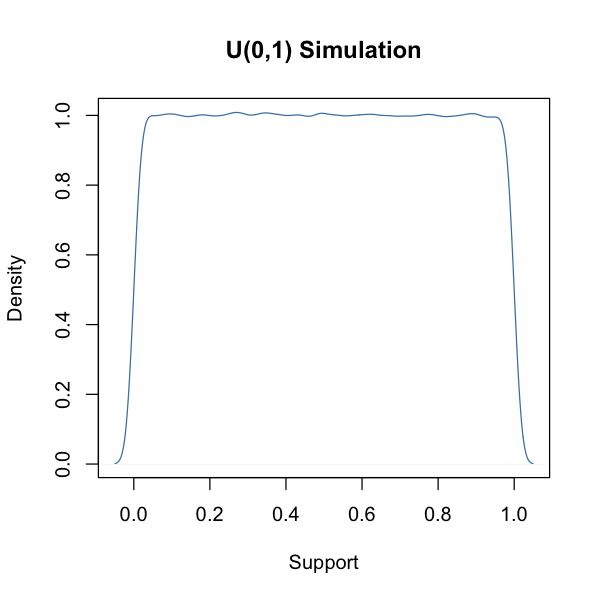

In [25]:
options(repr.plot.width=5, repr.plot.height=5)
a<-density(runif(1000000))
plot(a,main='U(0,1) Simulation',xlab='Support',ylab='Density',col='steelblue')

Covariance
Correlation
Hypothesis tessting
T-test
F-test
Confidence intervals
p-values
Type I/II errors
Test Power


This is definitely our least intuitive simulation so far, but when we consider the analogy with the Discrete Uniform distribution (and our dice simulation) it is much easier to make sense of. The first thing to note is the new terms **density** and **support**. In the Discrete uniform simulation we ran we displayed the frequency of each observation on the y-axis, which is simply the number of times each side of our 'die' came up, and the observations on the x-axis. Density and support are in a sense the continuous form of of these. 

Density is an estimation of a probability distribution, like our pmf from before. Using methods which we won't delve into here R creates its best guess of what probability distribution these data were drawn from. The important difference is that because the Continuous Uniform distribution is (obviously) a continuous distribution we must use a **probability *density* function** (pdf), not a pmf. The same rules still apply to our pdfs as our pmf though, and the most obvious way to see this is by the fact that all valid probability functions must have total probabilities of exactly 1, so by intregating our 1 by 1 sort-of-square above we know this rule still applies.

The support of our distribution is the range of values possible. This is useful because instead about thinking about any one point, we think about a range of points or a length of the support. 

We said before that the pmf of a Discrete Uniform distribution is:

$ P(X) =
  \begin{cases}
    1/n       &   \forall X \in S \text{ where |S|=n}\\
    0 & \text{o/w}
  \end{cases}
$

In the case of the Continuous Uniform distribution $U(a,b)$, where our support is [a,b], we have the pdf (which uses f(x)/x notation in place of P(X)/X notation to represent the continuous/discrete difference:

$ f(x) =
  \begin{cases}
    \frac{1}{b-a}       &   \text{for } x \in [a,b] \\
    0 & \text{o/w}
  \end{cases}
$

Unforunately this is not a 'point-and-shoot' probability function anymore, because we can't think about specific values in continuous distributions. Instead we need to think about the area within parts of a pdf, using integrals, and use that as a means of finding the probability of an event occuring. 

To make this more concrete lets go back to our picking a random number example. We've already established the probability of picking any specific probability, say 0.5, is exactly 0. But what if we wanted to find the chance we pick a number between, say, 0.4 and 0.6, or $P(0.4≤X≤0.6)$? 

In the Discrete Uniform case, say the dice example, we would solve this kind of problem (say $P(4≤X≤6)$) with sigma notation and simple addition.

 $P(4≤X≤6)=\sum\limits_{4}^{6}\frac{1}{6}=P(X=4)+P(X=5)+P(X=6)=\frac{1}{6}+\frac{1}{6}+\frac{1}{6}=0.5$
 
 By analogy we solve the continuous case when $X$~$U(0,1)$:
 
 $ P(0.4≤X≤0.6)=\int\limits_{0.4}^{0.6} \frac{1}{1-0}  \mathrm{d} x=0.6-0.4=0.2$
 
 Stated in plain English, this means there is a 20% change of choosing a number between 0.4 and 0.6, which in a way does make sense. If we drew a line between 0 and 1, the section of it which is between 0.4 and 0.6 is 20% of the line. This means the support [0.4,0.6] is 20% of the support [0,1], so we should expect to choose values in it 20% of the time. ***AND THAT'S WHAT THE SIMULATION SAID!*** Because our distribution was $U(0,1)$ we didn't need to 'scale' the size of our interval by any number - the [0.4,0.6] interval just takes up 0.6-0.4 (20%) of the total [0,1] support. So for any value in the [0,1] range the density is 1. If the support had been [0,10] then the interval [0.4,0.6] would have only been 2%, and a support of [0,100] would have been 0.2%. So in these cases the densities would have been 0.1 and 0.01 to 'scale' our interval accoridngly (because [0,1] is 0.1 and 0.01 the size of [0,10] and [0,100] repsectively*). Likewise if we'd chosen the support [0.3,0.7] then the interval would have been 50% of the support. So we'd need a density of... 2.5 (because [0,1] is 2.5 times the size of [0.4,0.6])! Let's see a quick simulation to make sure we've got that right.



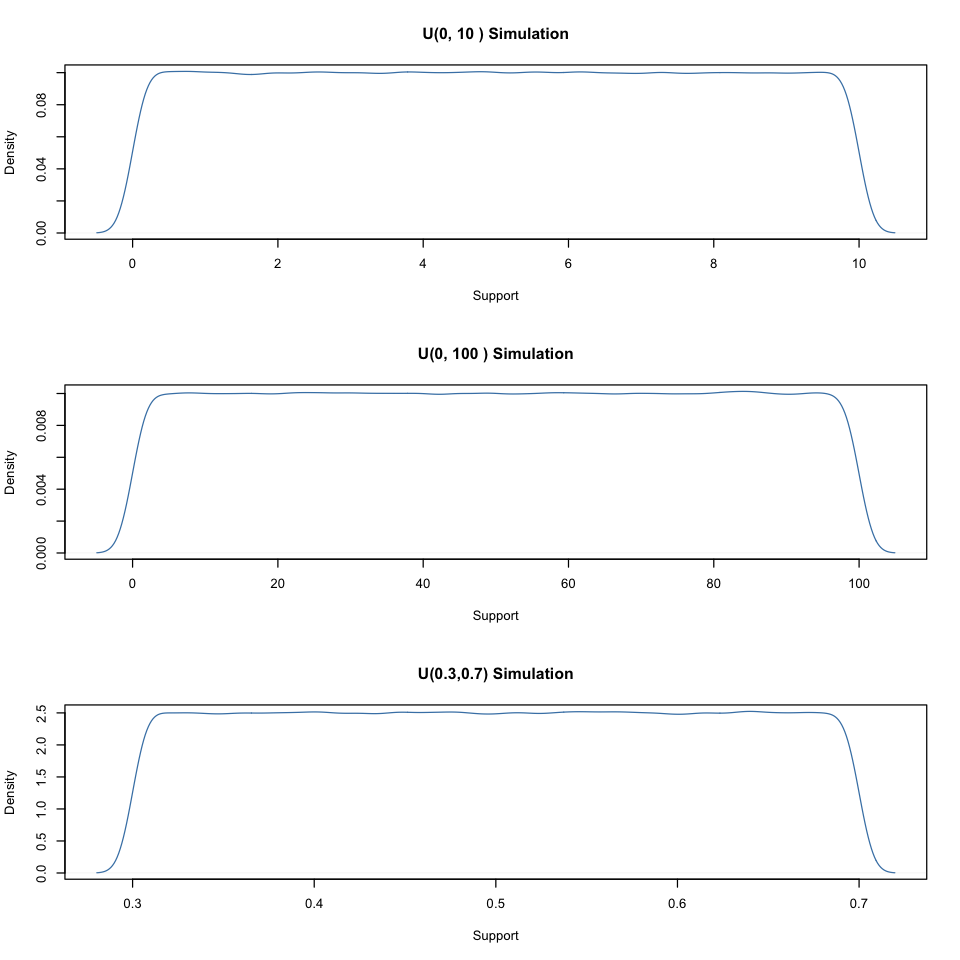

In [26]:
library(repr)
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(3,1))
for (i in 1:2) {a<-density(runif(1000000,0,10^i))
plot(a,main=paste('U(0,',10^i,') Simulation'),xlab='Support',ylab='Density',col='steelblue')}
plot(density(runif(1000000,0.3,0.7)),main='U(0.3,0.7) Simulation',xlab='Support',ylab='Density',col='steelblue')

The last thing for us to cover before moving on is the expected value of a $U(a,b)$ distributed random variable X, or $E(X)$. In the discrete case we calculated expected value using $E(X)=\sum\limits_{i=1}^{n}p_ix_i$, but as mentioned $p_i=0$ for every i in our distribution and there are infinite i's! This points us in a calculus direction. For continuous random variables we calculate expected value using $E(X)=\int\limits_{-\infty}^{\infty} xf(x)  \mathrm{d}x$, where $f(x)$ is the pdf of X. 

We already know the pdf of the $U(a,b)$ distribution is $ f(x) =
  \begin{cases}
    \frac{1}{b-a}       &   \text{for } x \in [a,b] \\
    0 & \text{o/w}
  \end{cases}
$, so our expected value is simply $E(X)=\int\limits_{-\infty}^{a} 0    \mathrm{d}x+\int\limits_{a}^{b} x\frac{1}{b-a}    \mathrm{d}x+\int\limits_{b}^{\infty} 0    \mathrm{d}x=\frac{b^2-a^2}{2(b-a)}=\frac{a+b}{2}$

So for our random number between 0 and 1 example, we would expected to choose 0.5 because that's exactly in the centre of our distribution! But of course we wouldn't be complete without a simulation:

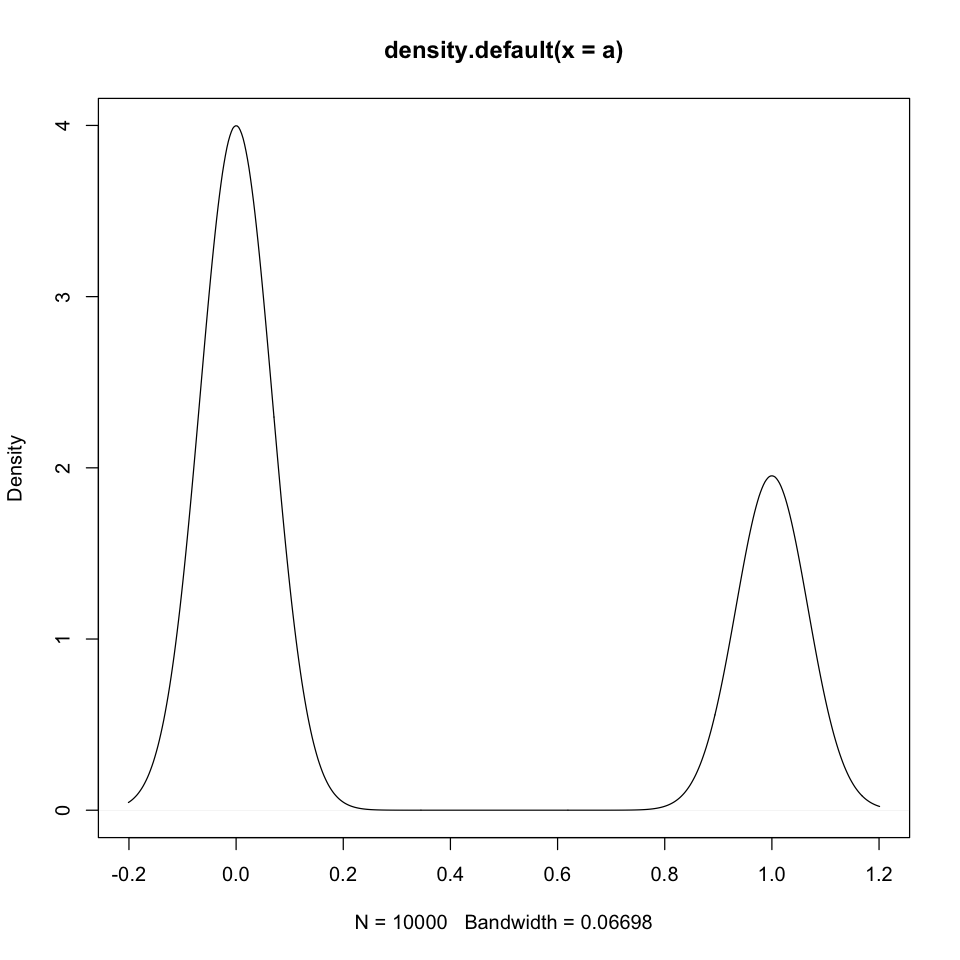

In [27]:
a<-c(rbinom(10000,1,1/3))
plot(density(a))

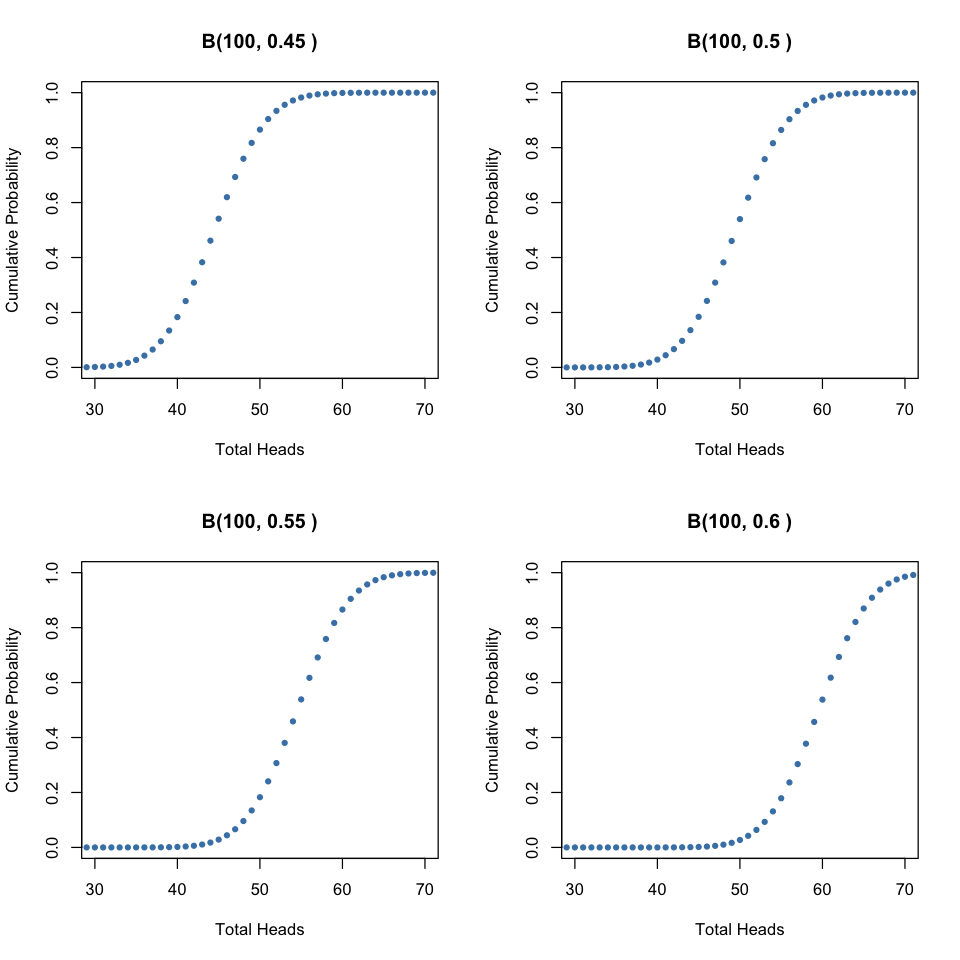

In [28]:
library(repr)
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2,2))
for (i in 1:4) {p<-0.4+i/20
    c<-paste('B(100,',p,')')  
                plot(pbinom(1:100,100,p),col='steelblue',xlab='Total Heads',ylab='Cumulative Probability',main=c,xlim=c(30,70),ylim=c(0,1),pch=20)
               }

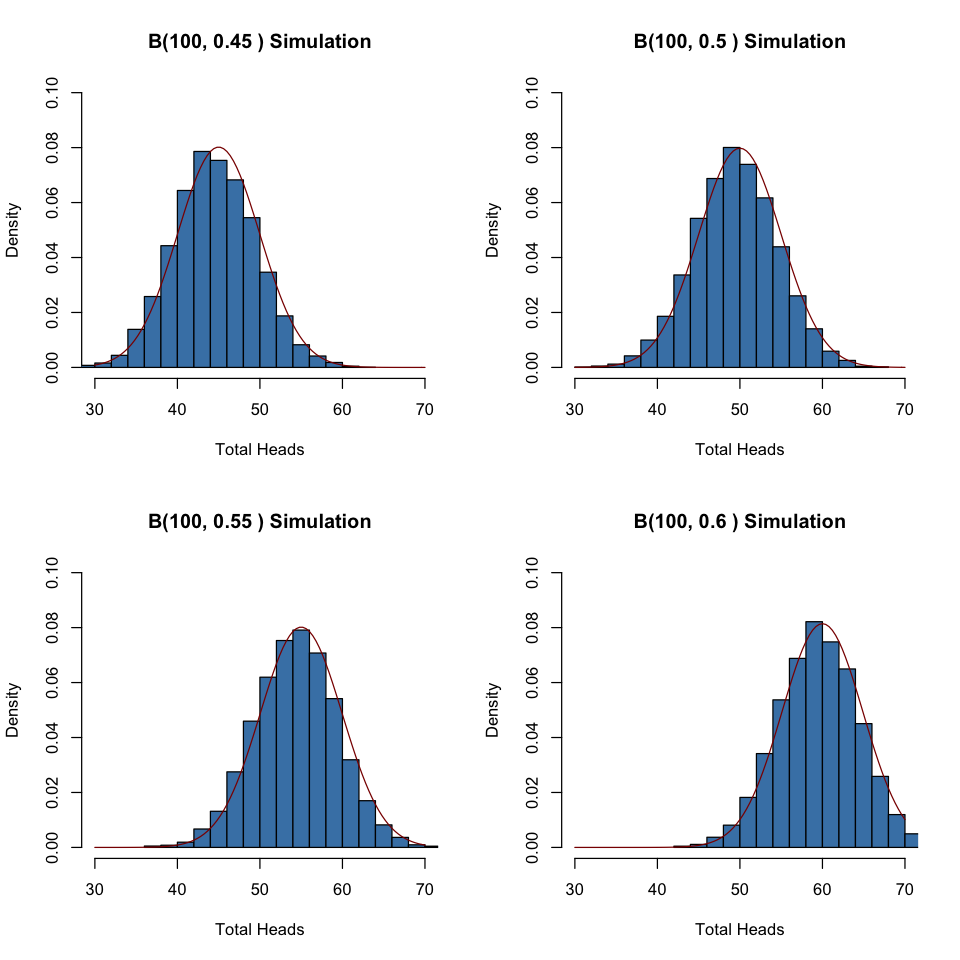

In [29]:
library(repr)
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2,2))
for (i in 1:4) {p<-0.4+i/20
    c<-paste('B(100,',p,')')  
                hist(rbinom(10000,100,p),col='steelblue',xlab='Total Heads',main=paste(c, 'Simulation'),xlim=c(30,70),ylim=c(0,0.1),freq=F)
    curve(dnorm(x,100*p,sqrt(100*p*(1-p))),add=T,col='darkred')}


$N(np,np(1-p))$

The last concept we'll introduce is the variance

Variance is given by the formula $E(X^2)-(E(X))^2$ (*not proved*), so we know $Var(X)=p-p^2=p(1-p)$. This might seem irrelevant now but once we introduce the **Central Limit Theorem** (CLT) and the **Laws of Large Numbers** (LLNs) in another notebook it will be extremely useful to know these facts.

The last key thing to say about this distribution is that, like all distributions here, it is crucial we assume our random variables are independent. If one roll of our dice affects the likelihoods of future rolls then X will no longer be distributed around the Bernoulli distirbution.